In [10]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#Import Data
dataframe = pd.read_csv('./survey.csv')
#view Sample
dataframe.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [12]:
Data1 = pd.DataFrame(dataframe, columns = ['Country','state','family_history','treatment', 'work_interfere'])

In [13]:
# Choose column for mental_illness
conditions = [
    (dataframe['family_history'] == 'Yes') ,
    (dataframe['treatment'] == 'Yes') ,
    (dataframe['work_interfere'] == 'Often')
]
choices = ['yes','yes','yes']
Data1['mental_Issue'] = np.select(conditions, choices, default = 'no')

In [14]:
#Mental illness 
MI = pd.DataFrame(Data1, columns = ['Country','state','mental_Issue'])
MI_positive = MI[MI['mental_Issue'].str.contains('yes')]
MI_positive.head()

,Country,state,mental_Issue
0,United States,IL,yes
3,United Kingdom,NaN,yes
5,United States,TN,yes
6,United States,MI,yes
8,United States,IL,yes


In [15]:
#Analysis done for states in US
MI_positive_US = MI_positive[MI_positive['Country'].str.contains('United States')]
MI_positive_US.head()

,Country,state,mental_Issue
0,United States,IL,yes
5,United States,TN,yes
6,United States,MI,yes
8,United States,IL,yes
10,United States,OH,yes


In [16]:
#Preparing the data for visualization
MI_positive_US_StatesData = pd.DataFrame(MI_positive_US, columns = ['state','mental_Issue'])
MI_positive_US_StatesData.head()

,state,mental_Issue
0,IL,yes
5,TN,yes
6,MI,yes
8,IL,yes
10,OH,yes


In [17]:
#Grouping the data
MI_positive_US_StatesData_Group = MI_positive_US_StatesData.groupby(['state'])['state'].count().reset_index(name='total')
MI_positive_US_StatesData_Group.head()

,state,total
0,AL,7
1,AZ,6
2,CA,103
3,CO,4
4,CT,3


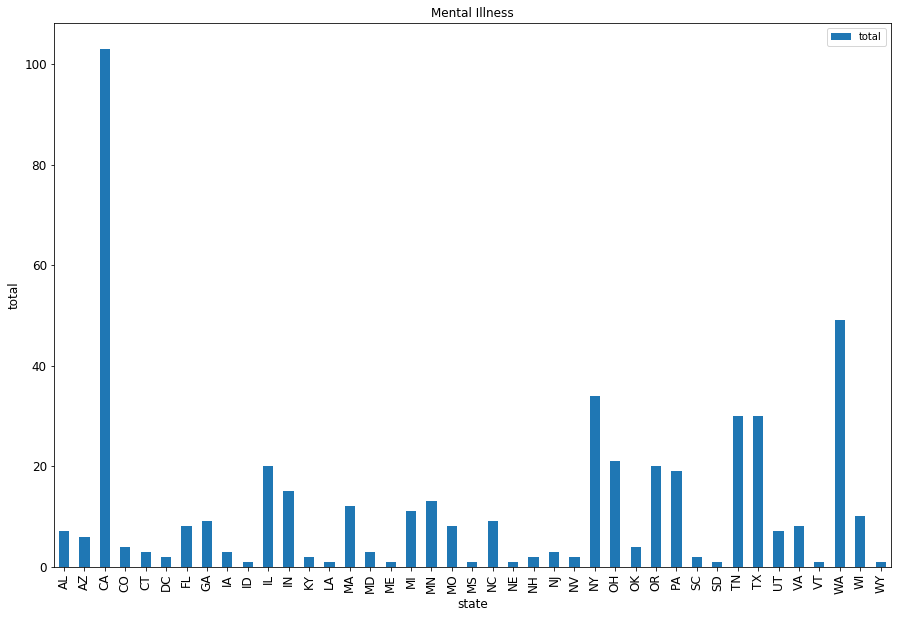

In [18]:
#Visualizing the calculated data
ax = MI_positive_US_StatesData_Group[['state','total']].plot(x = 'state', y = 'total',kind='bar', title ="Mental Illness", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("state", fontsize=12)
ax.set_ylabel("total", fontsize=12)
plt.show()